<a href="https://colab.research.google.com/github/saitehith28/Deep-Learning/blob/main/Deep_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image

In [7]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False
x=InceptionV3_model.output
x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
output=Dense(units=4,activation='softmax')(x)
model=Model(InceptionV3_model.input,output)
model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics='accuracy')

In [9]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/Mini/data/Training'
test_path = '/content/drive/MyDrive/Mini/data/Testing'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Data/train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
test_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Data/test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


<ipython-input-10-98172e0017e6>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/12
20/20 [==============================] - 184s 9s/step - loss: 1.4130 - accuracy: 0.3279 - val_loss: 1.1539 - val_accuracy: 0.4825
Epoch 2/12
20/20 [==============================] - 17s 858ms/step - loss: 1.2219 - accuracy: 0.4600 - val_loss: 1.0690 - val_accuracy: 0.5429
Epoch 3/12
20/20 [==============================] - 17s 859ms/step - loss: 1.1123 - accuracy: 0.5188 - val_loss: 0.9542 - val_accuracy: 0.6413
Epoch 4/12
20/20 [==============================] - 17s 847ms/step - loss: 1.0195 - accuracy: 0.5400 - val_loss: 0.8779 - val_accuracy: 0.6508
Epoch 5/12
20/20 [==============================] - 17s 840ms/step - loss: 0.9607 - accuracy: 0.5661 - val_loss: 0.8972 - val_accuracy: 0.6413
Epoch 6/12
20/20 [==============================] - 22s 1s/step - loss: 0.9261 - accuracy: 0.5905 - val_loss: 0.8471 - val_accuracy: 0.6190
Epoch 7/12
20/20 [==============================] - 16s 836ms/step - loss: 0.8574 - accuracy: 0.6411 - val_loss: 0.8387 - val_accuracy: 0.6190
Epoc

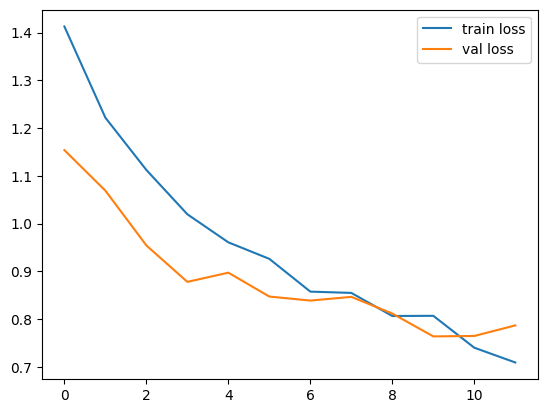

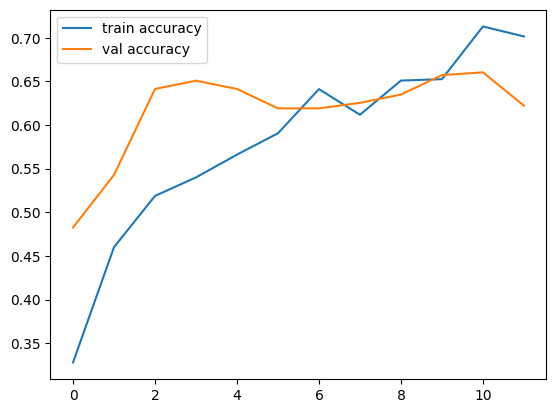

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(model1.history['accuracy'], label='train accuracy')
plt.plot(model1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')